In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('spam.csv',encoding='ANSI')

In [84]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [86]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [88]:
df.shape

(5572, 5)

<h3>Data cleaning</h3>

In [91]:
# columns unnamed 2, unnamed 3, unnamed 4 don't have that much data hence dropping them

In [93]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [122]:
df = df.rename(columns = {'v1':'target','v2':'sms'})
df.sample(5)

,target,sms
4899,spam,"ou are guaranteed the latest Nokia Phone, a 40..."
3773,ham,Ok... But bag again..
1010,ham,Lol I would but my mom would have a fit and te...
4006,ham,I'm reaching home in 5 min.
2198,ham,I'm in a movie. Call me 4 wat?


In [124]:
# checking for duplicate values
df.duplicated().sum()

0

In [126]:
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [136]:
df.duplicated().sum()

0

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [134]:
df['target'] = le.fit_transform(df['target'])
df.sample(5)

,target,sms
5498,0,Why did I wake up on my own &gt;:(
974,0,Eh u send wrongly lar...
4622,0,U need my presnts always bcz U cant mis love. ...
5552,0,Have a safe trip to Nigeria. Wish you happines...
3411,0,No she didnt. I will search online and let you...


<h3>EDA

In [139]:
df.sample(5)

,target,sms
1895,0,"Uh, heads up we don't have THAT much left"
2557,1,This message is brought to you by GMW Ltd. and...
3829,0,I agree. So i can stop thinkin about ipad. Can...
4595,0,Carlos is down but I have to pick it up from h...
2338,0,"Alright, see you in a bit"


In [141]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

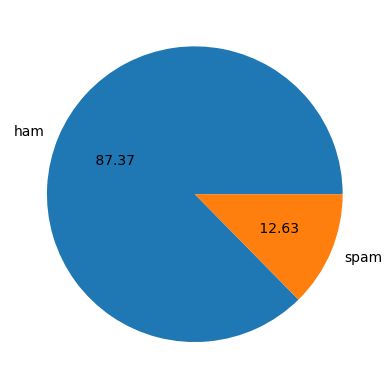

In [155]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='% 0.2f')
plt.show()

In [157]:
# data is imbalanced

In [159]:
!pip install nltk

In [161]:
import nltk

In [163]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\upadh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [193]:
df['num_characters'] = df['sms'].apply(len)
df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [211]:
df.sample(5)

,target,sms,num_characters,num_words,num_sentences
2921,0,I've not sent it. He can send me.,33,11,2
1031,0,Yup bathe liao...,17,4,1
3336,0,I AM AT THE GAS STATION. GO THERE.,34,10,2
3814,0,"Not yet chikku..k, then wat abt tht guy did he...",82,20,1
5474,0,Where's mummy's boy ? Is he being good or bad ...,122,30,5


In [221]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [223]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [227]:
# On an average the number of words, number of sentences and number of characters are all greater in spam sms

<Axes: >

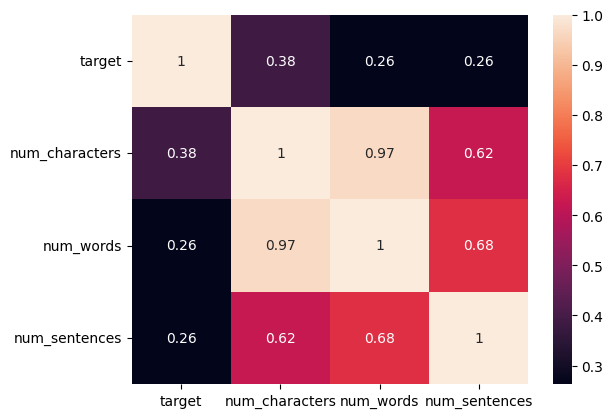

In [239]:
new_df = df.drop(['sms'],axis=1)
sns.heatmap(new_df.corr(),annot=True)

In [243]:
# all the columns are highy correlated, we should take one of these columns only if so then take num_charactes because it is more correlated to
#target in comparision to others

<h3>Text Preprocessing</h3>
<ul>
    <li>Lower case</li>
    <li>Tokenization</li>
    <li>Removing special characters</li>
    <li>Removing stop words and punctuations</li>
    <li>stemming</li>
</ul>